In [101]:
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.special import erfc
from functools import partial

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

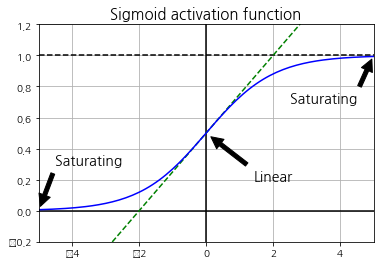

In [3]:
z = np.arange(-10, 10, 0.1)
plt.plot([-5, 5], [0, 0], c='k')
plt.plot([0, 0], [-0.2, 1.2], c='k')
plt.plot([-5, 5], [1, 1], c='k', linestyle='--')
plt.plot([-5, 5], [-3/4, 7/4], c='g', linestyle='--')
plt.plot(z, logit(z), c='b')
plt.title('Sigmoid activation function', fontsize=15)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.xlim(-5, 5)
plt.ylim(-0.2, 1.2)
plt.grid()
plt.show()

In [4]:
# Xavier 초기화와 He 초기화
# 각 층의 연결 가중치를 무작위로 초기화하는 방법
# 자비에(= 세이비어 = 글로럿) 초기화라 부른다.
# 여러가지 초기화 방법들
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'normal',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'uniform',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
# fan_in 대신 fan_out 기반의 균등분포 He 초기화를 사용하고 싶다면 아래와 같이 Variance Scaling을 사용할 수 있다.
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
# 수렴하지 않는 활성화 함수
# LeakyReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

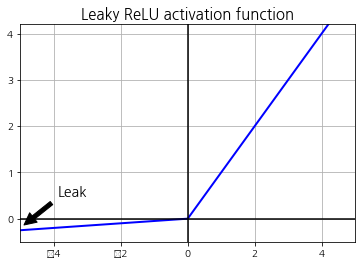

In [8]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot((-5, 5), (0, 0), 'k-')
plt.plot((0, 0), (-0.5, 4.2), 'k-')
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.9, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14)
plt.xlim(-5, 5)
plt.ylim(-0.5, 4.2)
plt.title('Leaky ReLU activation function', fontsize=15)
plt.grid()
plt.show()

In [9]:
# 여러가지 activation function
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [10]:
# ReLU 기반의 activation function
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 1.3269 - acc: 0.6025 - val_loss: 0.8931 - val_acc: 0.7208
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.8077 - acc: 0.7375 - val_loss: 0.7165 - val_acc: 0.7662
Epoch 3/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6914 - acc: 0.7744 - val_loss: 0.6387 - val_acc: 0.7938
Epoch 4/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.6298 - acc: 0.7932 - val_loss: 0.5911 - val_acc: 0.8080
Epoch 5/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5893 - acc: 0.8048 - val_loss: 0.5592 - val_acc: 0.8152
Epoch 6/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5607 - acc: 0.8132 - val_loss: 0.5366 - val_acc: 0.8206
Epoch 7/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5393 - acc: 0.8191 - val_loss: 0.5

In [15]:
# PReLU
tf.random.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 54us/sample - loss: 1.3444 - acc: 0.6037 - val_loss: 0.8991 - val_acc: 0.7234
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.8021 - acc: 0.7441 - val_loss: 0.7111 - val_acc: 0.7764
Epoch 3/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6809 - acc: 0.7782 - val_loss: 0.6340 - val_acc: 0.7988
Epoch 4/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6199 - acc: 0.7964 - val_loss: 0.5874 - val_acc: 0.8124
Epoch 5/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5804 - acc: 0.8097 - val_loss: 0.5562 - val_acc: 0.8214
Epoch 6/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5525 - acc: 0.8181 - val_loss: 0.5335 - val_acc: 0.8268
Epoch 7/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5316 - acc: 0.8232 - val_loss: 0.5

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

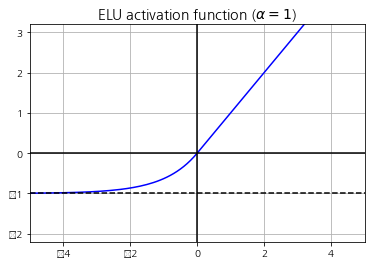

In [19]:
plt.plot(z, elu(z), 'b-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.xlim(-5, 5)
plt.ylim(-2.2, 3.2)
plt.grid()
plt.show()

In [20]:
keras.layers.Dense(10, activation="elu")

In [21]:
# 훈련하는 동안 완전 연결 층만 쌓아서 신경망을 만들고 SELU 활성화 함수와 LeCun 초기화를 사용한다면 자기 정규화됩니다. 
# 각 층의 출력이 평균과 표준편차를 보존하는 경향이 있습니다. 이는 그레이디언트 소실과 폭주 문제를 막아줍니다. 
# 그 결과로 SELU 활성화 함수는 이런 종류의 네트워크(특히 아주 깊은 네트워크)에서 다른 활성화 함수보다 뛰어난 성능을 종종 냅니다. 
# 따라서 꼭 시도해 봐야 합니다. 하지만 SELU 활성화 함수의 자기 정규화 특징은 쉽게 깨집니다. 
# ℓ1나 ℓ2 정규화, 드롭아웃, 맥스 노름, 스킵 연결이나 시퀀셜하지 않은 다른 토폴로지를 사용할 수 없습니다.
# (즉 순환 신경망은 자기 정규화되지 않습니다). 
# 하지만 실전에서 시퀀셜 CNN과 잘 동작합니다. 자기 정규화가 깨지면 SELU가 다른 활성화 함수보다 더 나은 성능을 내지 않을 것입니다.
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

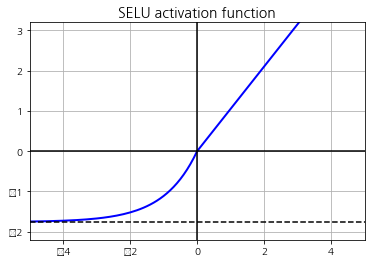

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [24]:
# 기본적으로 SELU 하이퍼파라미터(scale과 alpha)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정됩니다.
# (입력은 평균이 0이고 표준 편차 1로 표준화되었다고 가정합니다)
# 이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지합니다. 
# 이를 통해 그레이디언트 폭주와 소실 문제를 피할 수 있습니다.
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 32s 574us/sample - loss: 1.1816 - acc: 0.5387 - val_loss: 0.7464 - val_acc: 0.7408
Epoch 2/5
55000/55000 [==============================] - 30s 544us/sample - loss: 0.6449 - acc: 0.7764 - val_loss: 0.5877 - val_acc: 0.7952
Epoch 3/5
55000/55000 [==============================] - 30s 550us/sample - loss: 0.5402 - acc: 0.8134 - val_loss: 0.5153 - val_acc: 0.8222
Epoch 4/5
55000/55000 [==============================] - 30s 546us/sample - loss: 0.4862 - acc: 0.8330 - val_loss: 0.4725 - val_acc: 0.8400
Epoch 5/5
55000/55000 [==============================] - 30s 545us/sample - loss: 0.4510 - acc: 0.8444 - val_loss: 0.4653 - val_acc: 0.8390


In [31]:
# ReLU function에서의 훈련
np.random.seed(42)
tf.random.set_random_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [34]:
# SeLU에서 보다 정확도는 낮고 오차는 높은 것을 확인할 수 있다.
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 23s 415us/sample - loss: 2.0392 - acc: 0.2042 - val_loss: 1.6781 - val_acc: 0.3674
Epoch 2/5
55000/55000 [==============================] - 23s 427us/sample - loss: 1.4895 - acc: 0.4073 - val_loss: 1.1737 - val_acc: 0.5424
Epoch 3/5
55000/55000 [==============================] - 22s 402us/sample - loss: 1.1524 - acc: 0.5195 - val_loss: 0.9813 - val_acc: 0.5624
Epoch 4/5
55000/55000 [==============================] - 22s 398us/sample - loss: 0.9722 - acc: 0.6119 - val_loss: 0.8592 - val_acc: 0.6534
Epoch 5/5
55000/55000 [==============================] - 22s 398us/sample - loss: 0.9802 - acc: 0.6120 - val_loss: 0.9357 - val_acc: 0.6212


In [35]:
# 배치 정규화 구현
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [37]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [38]:
bn1.updates

[<tf.Operation 'batch_normalization/cond_2/Merge' type=Merge>,
 <tf.Operation 'batch_normalization/cond_3/Merge' type=Merge>]

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.8569 - acc: 0.7115 - val_loss: 0.5546 - val_acc: 0.8132
Epoch 2/10
55000/55000 [==============================] - 7s 120us/sample - loss: 0.5743 - acc: 0.8015 - val_loss: 0.4788 - val_acc: 0.8392
Epoch 3/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.5128 - acc: 0.8223 - val_loss: 0.4438 - val_acc: 0.8514
Epoch 4/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4780 - acc: 0.8326 - val_loss: 0.4238 - val_acc: 0.8566
Epoch 5/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4566 - acc: 0.8397 - val_loss: 0.4077 - val_acc: 0.8638
Epoch 6/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4409 - acc: 0.8451 - val_loss: 0.3960 - val_acc: 0.8652
Epoch 7/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4215 - acc: 0.8513 - val_lo

In [41]:
# 이따금 활성화 함수전에 BN을 적용해도 잘 동작합니다(여기에는 논란의 여지가 있습니다). 
# 또한 BatchNormalization 층 이전의 층은 편향을 위한 항이 필요 없습니다. 
# BatchNormalization 층이 이를 무효화하기 때문입니다. 따라서 필요 없는 파라미터이므로 use_bias=False를 지정하여 층을 만들 수 있습니다
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 118us/sample - loss: 1.0649 - acc: 0.6655 - val_loss: 0.6672 - val_acc: 0.7958
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.6722 - acc: 0.7835 - val_loss: 0.5455 - val_acc: 0.8214
Epoch 3/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.5865 - acc: 0.8058 - val_loss: 0.4899 - val_acc: 0.8356
Epoch 4/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5420 - acc: 0.8179 - val_loss: 0.4568 - val_acc: 0.8428
Epoch 5/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5093 - acc: 0.8267 - val_loss: 0.4352 - val_acc: 0.8508
Epoch 6/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4867 - acc: 0.8329 - val_loss: 0.4175 - val_acc: 0.8566
Epoch 7/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4732 - acc: 0.8373 - val_lo

In [44]:
# 그레디언트 폭주 문제를 완화하는 다른 방법은 역전파될 때 일정 임곗값을 넘어서지 못하게 그레디언트를 잘라내는 것이다.
# 이것을 그레디언트 클리핑이라고 한다.
# optimizer = keras.optimizers.SGD(clipnorm=1.0)
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [45]:
# 케라스 모델 재사용하기
# fashion 데이터 셋으로 훈련하기
# 패션 MNIST 훈련 세트를 두 개로 나누어 보죠
# X_train_A: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
# X_train_B: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트
# 검증 세트와 테스트 세트도 이렇게 나눕니다. 하지만 이미지 개수는 제한하지 않습니다.

# A 세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B 세트(이진 분류)를 해결해 보겠습니다. A 작업에서 B 작업으로 약간의 지식이 전달되기를 기대합니다. 왜냐하면 A 세트의 클래스(스니커즈, 앵클 부츠, 코트, 티셔츠 등)가 B 세트에 있는 클래스(샌달과 셔츠)와 조금 비슷하기 때문입니다. 하지만 Dense 층을 사용하기 때문에 동일한 위치에 나타난 패턴만 재사용할 수 있습니다(반대로 합성곱 층은 훨씬 많은 정보를 전송합니다. 학습한 패턴을 이미지의 어느 위치에서나 감지할 수 있기 때문입니다. CNN 장에서 자세히 알아 보겠습니다).
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [46]:
X_train_A.shape

(43986, 28, 28)

In [47]:
X_train_B.shape

(200, 28, 28)

In [48]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [49]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [50]:
tf.random.set_random_seed(42)
np.random.seed(42)

In [51]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [52]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [53]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 95us/sample - loss: 0.5712 - acc: 0.8102 - val_loss: 0.3720 - val_acc: 0.8714
Epoch 2/20
43986/43986 [==============================] - 4s 82us/sample - loss: 0.3545 - acc: 0.8764 - val_loss: 0.3191 - val_acc: 0.8906
Epoch 3/20
43986/43986 [==============================] - 3s 79us/sample - loss: 0.3183 - acc: 0.8893 - val_loss: 0.2968 - val_acc: 0.9008
Epoch 4/20
43986/43986 [==============================] - 3s 79us/sample - loss: 0.2985 - acc: 0.8965 - val_loss: 0.2836 - val_acc: 0.9038
Epoch 5/20
43986/43986 [==============================] - 3s 79us/sample - loss: 0.2852 - acc: 0.9010 - val_loss: 0.2727 - val_acc: 0.9081
Epoch 6/20
43986/43986 [==============================] - 3s 79us/sample - loss: 0.2744 - acc: 0.9059 - val_loss: 0.2665 - val_acc: 0.9083
Epoch 7/20
43986/43986 [==============================] - 3s 78us/sample - loss: 0.2664 - acc: 0.9088 - val_loss: 0.2

In [54]:
model_A.save("my_model_A.h5")

In [55]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [57]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/sample - loss: 0.5527 - acc: 0.7750 - val_loss: 0.4833 - val_acc: 0.8621
Epoch 2/20
200/200 [==============================] - 0s 334us/sample - loss: 0.4415 - acc: 0.8950 - val_loss: 0.4191 - val_acc: 0.8976
Epoch 3/20
200/200 [==============================] - 0s 339us/sample - loss: 0.3823 - acc: 0.9400 - val_loss: 0.3722 - val_acc: 0.9158
Epoch 4/20
200/200 [==============================] - 0s 344us/sample - loss: 0.3368 - acc: 0.9600 - val_loss: 0.3379 - val_acc: 0.9239
Epoch 5/20
200/200 [==============================] - 0s 329us/sample - loss: 0.3021 - acc: 0.9700 - val_loss: 0.3088 - val_acc: 0.9371
Epoch 6/20
200/200 [==============================] - 0s 334us/sample - loss: 0.2740 - acc: 0.9800 - val_loss: 0.2856 - val_acc: 0.9442
Epoch 7/20
200/200 [==============================] - 0s 334us/sample - loss: 0.2499 - acc: 0.9800 - val_loss: 0.2630 - val_acc: 0.9523
Epoc

In [58]:
model_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_219 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_220 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_221 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_222 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_223 (Dense)            (None, 8)                

In [59]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_224 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_225 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_226 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_227 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_228 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                

In [60]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [61]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [62]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [63]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.2427 - acc: 0.9050 - val_loss: 0.2865 - val_acc: 0.8925
Epoch 2/4
200/200 [==============================] - 0s 319us/sample - loss: 0.2368 - acc: 0.9050 - val_loss: 0.2797 - val_acc: 0.8976
Epoch 3/4
200/200 [==============================] - 0s 354us/sample - loss: 0.2307 - acc: 0.9050 - val_loss: 0.2727 - val_acc: 0.9037
Epoch 4/4
200/200 [==============================] - 0s 319us/sample - loss: 0.2247 - acc: 0.9100 - val_loss: 0.2667 - val_acc: 0.9067
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 1s 3ms/sample - loss: 0.2029 - acc: 0.9150 - val_loss: 0.2185 - val_acc: 0.9290
Epoch 2/16
200/200 [==============================] - 0s 354us/sample - loss: 0.1657 - acc: 0.9550 - val_loss: 0.1851 - val_acc: 0.9442
Epoch 3/16
200/200 [==============================] - 0s 344us/sample - loss: 0.1395 - acc: 0.9600 -

In [64]:
model_B.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 48us/sample - loss: 0.1257 - acc: 0.9865


[0.12574168050289153, 0.9865]

In [65]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 48us/sample - loss: 0.0630 - acc: 0.9940


[0.06297707483172417, 0.994]

In [66]:
(100 - 98.65) / (100 - 99.4)

2.250000000000012

In [67]:
# 고속 옵티마이저
# 모멘텀 옵티마이저
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [68]:
# 네스테로프 가속 경사
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [69]:
# 아다 그레디언트
# 심층 신경망에서는 global minimum에 도착하기 전 local minimum에 도달하기 때문에 피해야한다.
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [70]:
# RMSProp
# 아다 그레디언트에서 느리게 감소되어 local minimum에 도달하는 문제를 최근 그레디언트만 누적시킴으로 해결하였다.
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [71]:
# Adam 옵티마이저
# 모멘트 최적화와 RMSProp를 합친 것이다.
# 지난 그레이언트 지수 감소 평균을 따르고 RMSProp처럼 지난 그레디언트 제곱의 지수 감소된 평균을 따른다.
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [72]:
# Adamax 옵티마이저
# Adam 보다 더 안정적이기 때문에 성능이 좀 더 높다.
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [73]:
# Nadam 옵티마이저
# Adam 옵티마이저에 네스테로프 기법을 더한 것이다.
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [74]:
# 학습률 스케줄링
# learning_rate를 효과적으로 조절하는 방법

In [75]:
# 거듭제곱 기반 스케줄링
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [77]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4893 - acc: 0.8273 - val_loss: 0.4123 - val_acc: 0.8560
Epoch 2/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3819 - acc: 0.8648 - val_loss: 0.3840 - val_acc: 0.8662
Epoch 3/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3485 - acc: 0.8768 - val_loss: 0.3615 - val_acc: 0.8712
Epoch 4/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3271 - acc: 0.8844 - val_loss: 0.3672 - val_acc: 0.8674
Epoch 5/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3115 - acc: 0.8897 - val_loss: 0.3513 - val_acc: 0.8722
Epoch 6/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.2989 - acc: 0.8941 - val_loss: 0.3453 - val_acc: 0.8742
Epoch 7/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.2883 - acc: 0.8970 - val_loss: 0.3

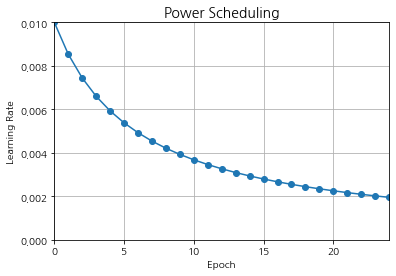

In [78]:
# learning rate가 처음엔 빠르게 감소하다가 점점 더 느리게 감소된다.
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [79]:
# 지수 기반 스케줄링
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [80]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [81]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [82]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 117us/sample - loss: 0.8355 - acc: 0.7582 - val_loss: 0.8983 - val_acc: 0.7524
Epoch 2/25
55000/55000 [==============================] - 6s 101us/sample - loss: 0.6802 - acc: 0.7917 - val_loss: 0.5510 - val_acc: 0.8216
Epoch 3/25
55000/55000 [==============================] - 6s 101us/sample - loss: 0.6013 - acc: 0.8155 - val_loss: 0.6094 - val_acc: 0.8146
Epoch 4/25
55000/55000 [==============================] - 6s 101us/sample - loss: 0.5266 - acc: 0.8363 - val_loss: 0.6125 - val_acc: 0.8202
Epoch 5/25
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5004 - acc: 0.8428 - val_loss: 0.5636 - val_acc: 0.8530
Epoch 6/25
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4546 - acc: 0.8572 - val_loss: 0.6301 - val_acc: 0.8528
Epoch 7/25
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4329 - acc: 0.8638 - val_lo

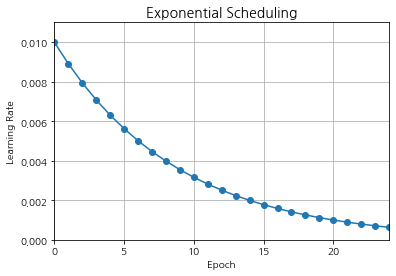

In [83]:
# 스텝마다 10배씩 점차 줄어들 것이다.
# s번 스텝마다 계속 10배씩 감소한다.
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [84]:
# 구간별 고정 스케줄링
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [85]:

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 9s 163us/sample - loss: 0.8426 - acc: 0.7572 - val_loss: 0.6305 - val_acc: 0.7896
Epoch 2/25
55000/55000 [==============================] - 8s 145us/sample - loss: 0.6412 - acc: 0.8017 - val_loss: 0.6306 - val_acc: 0.7964
Epoch 3/25
55000/55000 [==============================] - 8s 144us/sample - loss: 0.5793 - acc: 0.8248 - val_loss: 0.6417 - val_acc: 0.8392
Epoch 4/25
55000/55000 [==============================] - 8s 146us/sample - loss: 0.5301 - acc: 0.8360 - val_loss: 0.5557 - val_acc: 0.8094
Epoch 5/25
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4922 - acc: 0.8464 - val_loss: 0.4912 - val_acc: 0.8452
Epoch 6/25
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4410 - acc: 0.8591 - val_loss: 0.4512 - val_acc: 0.8500
Epoch 7/25
55000/55000 [==============================] - 8s 146us/sample - loss: 0.3975 - acc: 0.8681 - val_lo

In [86]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

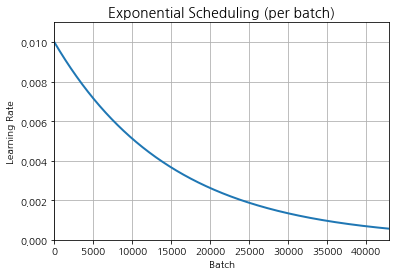

In [87]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [88]:
tf.random.set_random_seed(42)
np.random.seed(42)

In [89]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5985 - acc: 0.8062 - val_loss: 0.6604 - val_acc: 0.7848
Epoch 2/25
55000/55000 [==============================] - 4s 80us/sample - loss: 0.5206 - acc: 0.8341 - val_loss: 0.5799 - val_acc: 0.8322
Epoch 3/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5244 - acc: 0.8425 - val_loss: 0.5716 - val_acc: 0.8506
Epoch 4/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5422 - acc: 0.8428 - val_loss: 0.7799 - val_acc: 0.8308
Epoch 5/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5364 - acc: 0.8477 - val_loss: 0.5648 - val_acc: 0.8394
Epoch 6/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5230 - acc: 0.8517 - val_loss: 0.4705 - val_acc: 0.8502
Epoch 7/25
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4947 - acc: 0.8565 - val_loss: 0.8

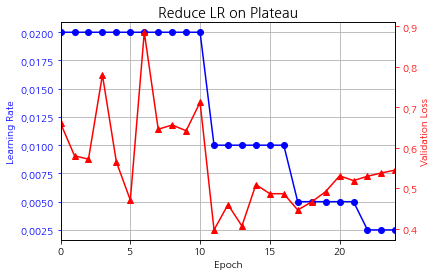

In [90]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [91]:
# tf.keras 스케줄러
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4862 - acc: 0.8289 - val_loss: 0.4364 - val_acc: 0.8440
Epoch 2/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3818 - acc: 0.8643 - val_loss: 0.3751 - val_acc: 0.8724
Epoch 3/25
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3481 - acc: 0.8761 - val_loss: 0.3615 - val_acc: 0.8728
Epoch 4/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3252 - acc: 0.8835 - val_loss: 0.3568 - val_acc: 0.8762
Epoch 5/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3086 - acc: 0.8894 - val_loss: 0.3464 - val_acc: 0.8798
Epoch 6/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2955 - acc: 0.8945 - val_loss: 0.3359 - val_acc: 0.8826
Epoch 7/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.2837 - acc: 0.8989 - val_loss: 0.3

In [92]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [93]:
#1사이클 스케줄링
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [94]:
tf.random.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [95]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

ValueError: setting an array element with a sequence.

In [97]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [98]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 2s 38us/sample - loss: 0.6438 - acc: 0.7776 - val_loss: 0.4798 - val_acc: 0.8374
Epoch 2/25
55000/55000 [==============================] - 2s 41us/sample - loss: 0.4528 - acc: 0.8430 - val_loss: 0.4292 - val_acc: 0.8492
Epoch 3/25
55000/55000 [==============================] - 2s 41us/sample - loss: 0.4104 - acc: 0.8566 - val_loss: 0.4041 - val_acc: 0.8622
Epoch 4/25
55000/55000 [==============================] - 2s 38us/sample - loss: 0.3824 - acc: 0.8656 - val_loss: 0.3860 - val_acc: 0.8666
Epoch 5/25
55000/55000 [==============================] - 2s 31us/sample - loss: 0.3612 - acc: 0.8713 - val_loss: 0.3694 - val_acc: 0.8720
Epoch 6/25
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3441 - acc: 0.8763 - val_loss: 0.3666 - val_acc: 0.8712
Epoch 7/25
55000/55000 [==============================] - 2s 38us/sample - loss: 0.3275 - acc: 0.8827 - val_loss: 0.3

In [99]:
# 규제를 사용하여 과대적합 피하기
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [100]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 116us/sample - loss: 1.6150 - acc: 0.8122 - val_loss: 0.7730 - val_acc: 0.8086
Epoch 2/2
55000/55000 [==============================] - 5s 99us/sample - loss: 0.7171 - acc: 0.8262 - val_loss: 0.6876 - val_acc: 0.8422


In [102]:
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 116us/sample - loss: 1.6288 - acc: 0.8129 - val_loss: 0.7105 - val_acc: 0.8410
Epoch 2/2
55000/55000 [==============================] - 6s 107us/sample - loss: 0.7208 - acc: 0.8264 - val_loss: 0.6860 - val_acc: 0.8398


In [103]:
# 드롭아웃 기법 14장에서 자세히 다룸
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 122us/sample - loss: 0.5772 - acc: 0.8014 - val_loss: 0.3785 - val_acc: 0.8564
Epoch 2/2
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4232 - acc: 0.8441 - val_loss: 0.3439 - val_acc: 0.8740


In [104]:
# 알파 드롭 아웃
tf.random.set_random_seed(42)
np.random.seed(42)

In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 101us/sample - loss: 0.6658 - acc: 0.7594 - val_loss: 0.5918 - val_acc: 0.8452
Epoch 2/20
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5592 - acc: 0.7943 - val_loss: 0.5396 - val_acc: 0.8512
Epoch 3/20
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5279 - acc: 0.8065 - val_loss: 0.5251 - val_acc: 0.8466
Epoch 4/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5074 - acc: 0.8110 - val_loss: 0.5014 - val_acc: 0.8574
Epoch 5/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4928 - acc: 0.8176 - val_loss: 0.4563 - val_acc: 0.8644
Epoch 6/20
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4823 - acc: 0.8203 - val_loss: 0.4531 - val_acc: 0.8512
Epoch 7/20
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4719 - acc: 0.8247 - val_loss: 0.

In [106]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.4385 - acc: 0.8712


[0.4384520082056522, 0.8712]

In [107]:
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - 3s 58us/sample - loss: 0.3267 - acc: 0.8886


[0.3266974939422174, 0.88856363]

In [108]:
history = model.fit(X_train_scaled, y_train)

55000/55000 [==============================] - 5s 91us/sample - loss: 0.4221 - acc: 0.8427


In [109]:
# 몬테 카를로 드롭아웃
tf.random.set_random_seed(42)
np.random.seed(42)

In [110]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type float64 of argument 'x'.

In [111]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [112]:
np.round(y_probas[:, :1], 2)

NameError: name 'y_probas' is not defined

In [113]:
np.round(y_proba[:1], 2)

NameError: name 'y_proba' is not defined

In [114]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

NameError: name 'y_probas' is not defined

In [115]:
y_pred = np.argmax(y_proba, axis=1)

NameError: name 'y_proba' is not defined

In [116]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

NameError: name 'y_pred' is not defined

In [117]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [118]:
tf.random.set_random_seed(42)
np.random.seed(42)

In [119]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [120]:
mc_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_259 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_260 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_261 (Dense)            (None, 10)              

In [121]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [122]:
mc_model.set_weights(model.get_weights())

In [123]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.06, 0.  , 0.83]],
      dtype=float32)

In [124]:
# 맥스 노름
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [125]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 8s 141us/sample - loss: 0.4745 - acc: 0.8331 - val_loss: 0.3909 - val_acc: 0.8598
Epoch 2/2
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3576 - acc: 0.8709 - val_loss: 0.3823 - val_acc: 0.8658
